In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow import keras
from sklearn.metrics import r2_score
import shap

In [36]:
scaler=pickle.load(open('scaler.pkl','rb'))
model=keras.models.load_model('./model')

df=pd.read_csv('combined_data.csv')
df.drop('DATE',axis=1,inplace=True)

X=df.drop('CSUSHPISA',axis=1).values
y=df['CSUSHPISA'].values

X_train=X[:int(len(X)*0.65)]
X_test=X[int(len(X)*0.65):]

y_train=y[:int(len(X)*0.65)]
y_test=y[int(len(X)*0.65):]


X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

<AxesSubplot:>

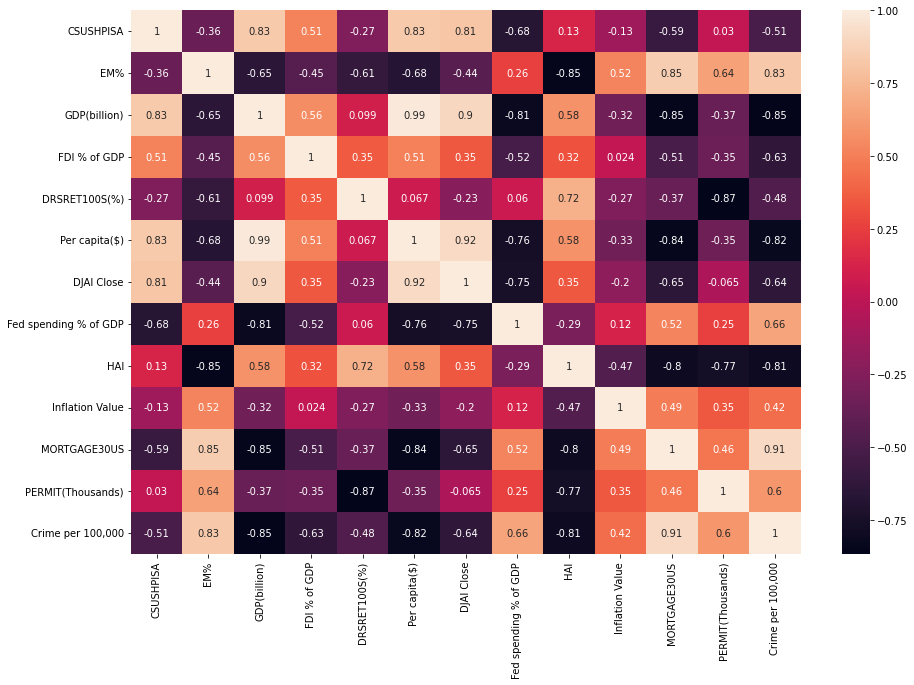

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [32]:
features=df.drop('CSUSHPISA',axis=1).columns

In [33]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    np.array(X_train),
    feature_names=features,
    class_names=['CSUSHPISA'],
    verbose=True,
    mode='regression')

exp = explainer.explain_instance(X_test[15], model.predict, num_features=10)

Intercept 142.7018853688218
Prediction_local [157.33576101]
Right: 171.98187


In [34]:
exp.show_in_notebook(show_table=True)

Using 163 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 89/89 [01:07<00:00,  1.32it/s]


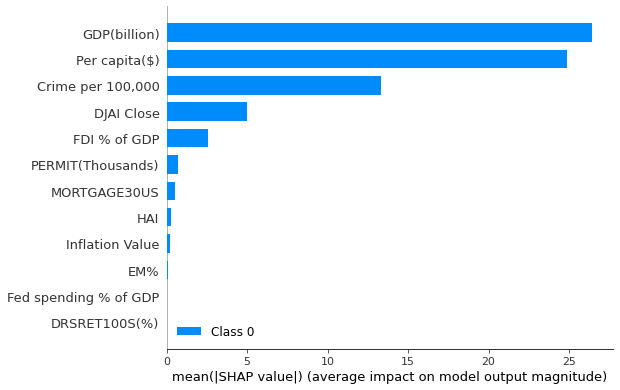

In [35]:
explainer = shap.KernelExplainer(model.predict,X_train)
shap_values = explainer.shap_values(X_test,nsamples=100)
shap.summary_plot(shap_values,X_test,feature_names=features)